<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workbook, we will evaluate a dataset about taxi tips that was collected for NYC taxi commission.  we will predict the amount of paid tip

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://docs.google.com/spreadsheets/d/1Tf2qzhnhvSgLMScPoII0KxhJcQz4JUdSvNjSgu5cchI/edit?usp=sharing

sheet_id = "1Tf2qzhnhvSgLMScPoII0KxhJcQz4JUdSvNjSgu5cchI"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


<Axes: >

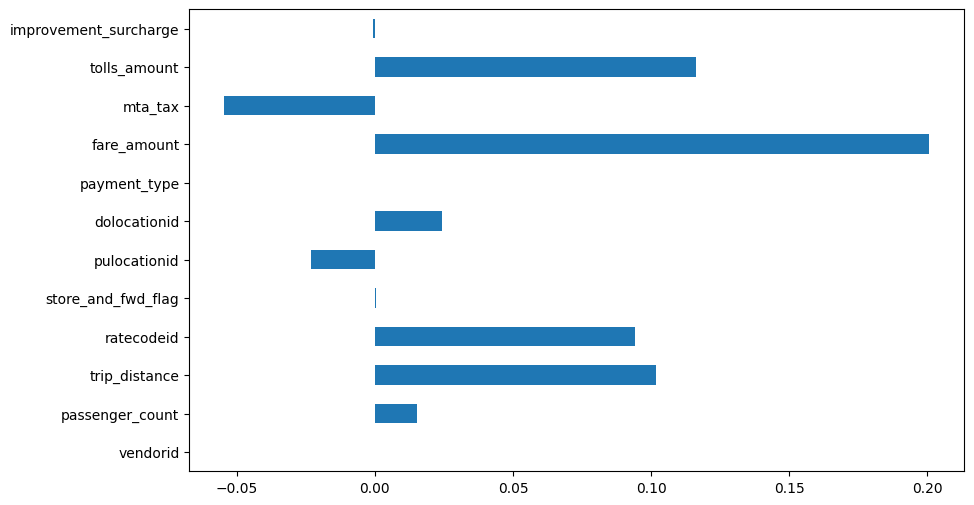

In [3]:
# we will plot the correlation of the target variable against the input variables

correlation_values = df.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10,6))


In [5]:
# preprocess the features

y = df.tip_amount.values.astype('float32')
X = df.drop('tip_amount', axis=1).values

X = normalize(X, axis=1, norm='l1', copy=False)
X

array([[0.00501165, 0.00250583, 0.04417771, ..., 0.00125291, 0.01739043,
        0.00250583],
       [0.00422869, 0.00211434, 0.04127199, ..., 0.00105717, 0.01467355,
        0.00211434],
       [0.0070609 , 0.00353045, 0.06287732, ..., 0.00176523, 0.02450132,
        0.00353045],
       ...,
       [0.00537996, 0.00268998, 0.04656355, ..., 0.00134499, 0.01866846,
        0.00268998],
       [0.00427606, 0.00213803, 0.03694518, ..., 0.00106902, 0.01483794,
        0.00213803],
       [0.00494731, 0.00247366, 0.04160689, ..., 0.00123683, 0.01716717,
        0.00247366]])

In [6]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion='squared_error',
                               max_depth=8,
                               random_state=42)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [9]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 25.596
R^2 score : 0.014


In [12]:
# identify the top 3 features with the most effect on tip amount

correlation_values = df.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending=False)[:3]

# As is evident from the output, Fare amount, toll amount and trip distance are the top features affecting the tip amount, which make logical sense.

,tip_amount
fare_amount,0.200638
tolls_amount,0.116172
trip_distance,0.101819
